# Project on financial crisis.

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
BAC = web.DataReader('BAC', 'yahoo', start, end)
C = web.DataReader('C', 'yahoo', start, end)
GS = web.DataReader('GS', 'yahoo', start, end)
JPM = web.DataReader('JPM', 'yahoo', start, end)
MS = web.DataReader('MS', 'yahoo', start, end)
WFC = web.DataReader('WFC', 'yahoo', start, end)

# Creating a list of tickers.

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Creating a new dataframe bank_stocks by concatenating all bank dataframes.

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

# Setting column names.

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# Checking the head of the bank_stocks dataframe.

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.870537  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.246769  
2006-01-04   31.799999  31.530001  10870000.0  21.000326  
2006-01-05   31.500000  31.495001  10158000.0  20.977020  
2006-01-06   31.580000  31.680000   8403800.0  21.100231  
2006-01-09   31.674999  31.674999   5619600.0  21.096903  

[5 rows x 36 columns]

# Expolatory data analysis.

In [8]:
bank_stocks.xs('Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

# Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

In [11]:
for i in tickers:
    returns[i + ' returns'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


# Creating a pairplot using seaborn of the returns dataframe.

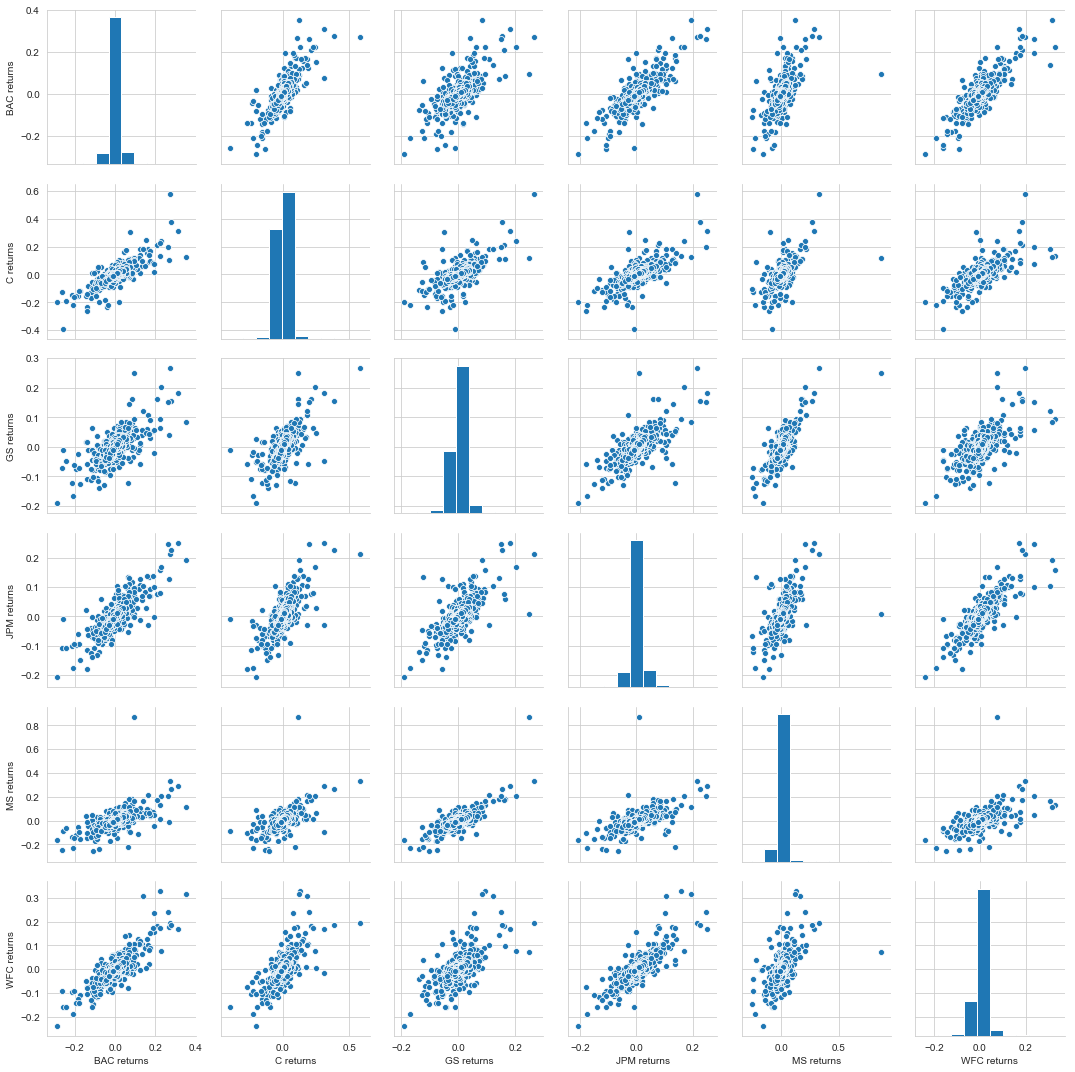

In [12]:
sns.pairplot(returns[1:])

# Using this returns DataFrame, we can see on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [13]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

# You can notice that Citigroup's largest drop and biggest gain were very close to one another.

In [14]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.std()

BAC returns    0.036647
C returns      0.038672
GS returns     0.025390
JPM returns    0.027667
MS returns     0.037819
WFC returns    0.030238
dtype: float64

In [23]:
returns['2015-1-1':'2015-12-31'].std()

BAC returns    0.016163
C returns      0.015289
GS returns     0.014046
JPM returns    0.014017
MS returns     0.016249
WFC returns    0.012591
dtype: float64

# Creating a distplot using seaborn of the 2015 returns for Morgan Stanley.

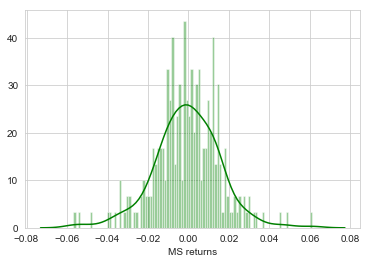

In [36]:
sns.distplot(returns['2015-1-1':'2015-12-31']['MS returns'], bins = 100, color = 'green')

Creating a distplot using seaborn of the 2008 returns for CitiGroup.

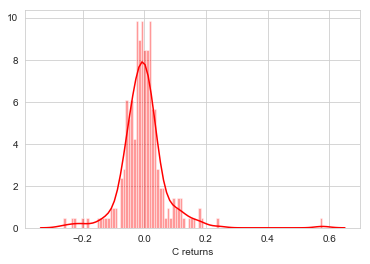

In [46]:
sns.distplot(returns['2008-1-1':'2008-12-31']['C returns'], color = 'red', bins = 100)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

# Creating a line plot showing Close price for each bank for the entire index of time.

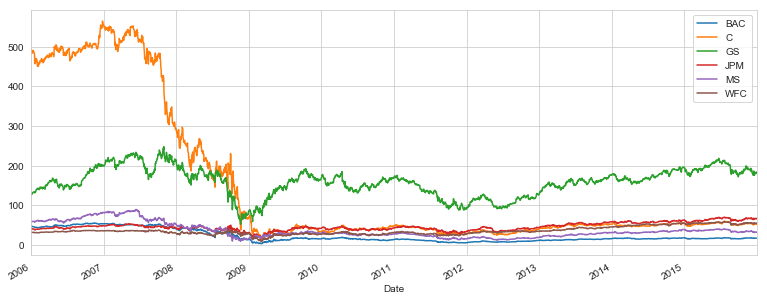

In [54]:
for i in tickers:
    bank_stocks[i]['Close'].plot(figsize = (13, 5), label = i)
plt.legend()

 Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

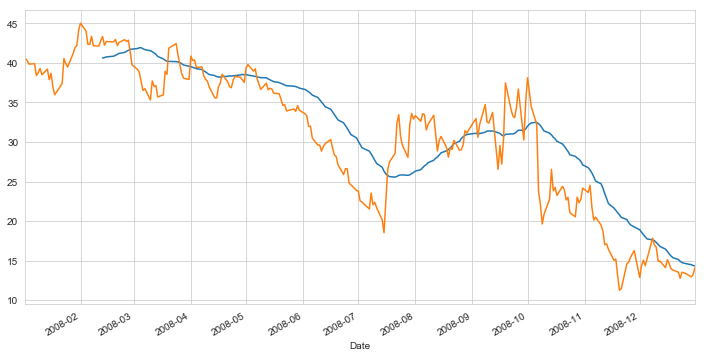

In [87]:
plt.figure(figsize = (12, 6))
BAC['Close'].loc['2008-1-1':'2008-12-31'].rolling(window = 30).mean().plot(label = '30 Day Avg')
BAC['Close'].loc['2008-1-1':'2008-12-31'].plot(label = 'BAC close')

# Creating a heatmap of the correlation between the stocks Close Price.

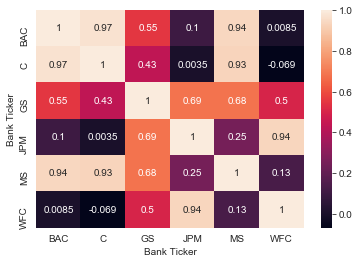

In [89]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)